In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,NaN,0.99539,-0.05889,0.85243,0.02306,0.83398,NaN,NaN,0.03760,...,0.56811,NaN,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,NaN
1,1.0,0.0,NaN,-0.18829,0.93035,-0.36156,-0.10868,NaN,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,NaN,NaN,0.88965,NaN,...,0.57528,-0.40220,0.58984,NaN,NaN,-0.17365,0.60436,NaN,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,NaN,NaN,0.00000,...,1.00000,NaN,NaN,NaN,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,NaN,0.0,1.00000,-0.02401,NaN,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,NaN,NaN,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,NaN,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,NaN,-0.04202,0.83479,0.00123,1.00000,NaN,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,NaN,-0.01920,0.94590,NaN,...,0.94520,NaN,0.93522,0.04925,0.93159,0.08168,0.94066,NaN,NaN,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,NaN,0.02446,...,0.93988,0.03193,NaN,NaN,0.92120,0.02242,NaN,0.00442,0.92697,-0.00577
349,1.0,NaN,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,NaN,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,NaN,NaN,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	68
float64		column 2	68
float64		column 3	36
float64		column 4	0
float64		column 5	34
float64		column 6	34
float64		column 7	70
float64		column 8	138
float64		column 9	34
float64		column 10	138
float64		column 11	0
float64		column 12	104
float64		column 13	104
float64		column 14	70
float64		column 15	104
float64		column 16	104
float64		column 17	0
float64		column 18	68
float64		column 19	70
float64		column 20	70
float64		column 21	0
float64		column 22	68
float64		column 23	104
float64		column 24	68
float64		column 25	68
float64		column 26	70
float64		column 27	102
float64		column 28	70
float64		column 29	70
float64		column 30	102
float64		column 31	102
float64		column 32	36
float64		column 33	70
float64		column 34	102


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,283.000000,283.0,315.000000,351.000000,317.000000,317.000000,281.000000,213.000000,317.000000,213.000000,...,283.000000,281.000000,249.000000,281.000000,281.000000,249.000000,249.000000,315.000000,281.000000,249.000000
mean,0.883392,0.0,0.639285,0.044372,0.600556,0.120995,0.601630,0.112497,0.531308,0.134766,...,0.409718,-0.046521,0.573073,-0.044802,0.381284,0.020058,0.346522,-0.007194,0.330908,0.023021
std,0.321521,0.0,0.485626,0.441435,0.525180,0.443328,0.432531,0.407719,0.477596,0.430363,...,0.555322,0.476169,0.448170,0.497737,0.559112,0.436835,0.547090,0.502245,0.509047,0.396110
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.469375,-0.064735,0.431170,-0.024230,0.333330,-0.019200,0.141770,-0.036360,...,0.000000,-0.264810,0.382550,-0.241310,0.000000,-0.134920,0.000000,-0.230220,0.000000,-0.089780
50%,1.000000,0.0,0.857360,0.016310,0.805620,0.019540,0.770310,0.013860,0.680650,0.015980,...,0.537500,-0.015350,0.672870,-0.017680,0.483480,0.000000,0.434840,0.000000,0.388950,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.297570,0.965750,0.221080,0.951350,0.287880,...,0.895310,0.113480,0.966530,0.136380,0.877010,0.112180,0.783170,0.182150,0.762710,0.106980
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

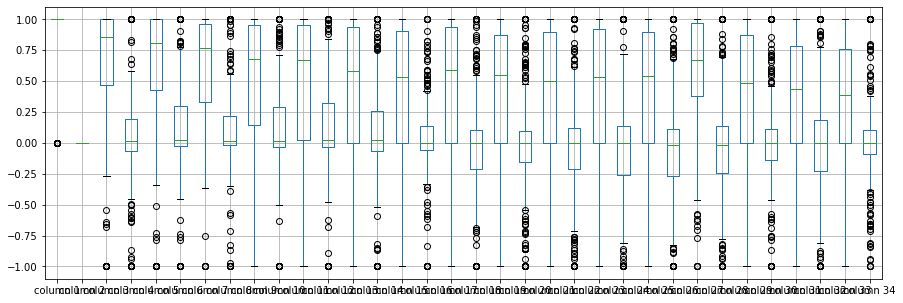

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.883392
column 2     0.000000
column 3     0.639285
column 4     0.044372
column 5     0.600556
column 6     0.120995
column 7     0.601630
column 8     0.112497
column 9     0.531308
column 10    0.134766
column 11    0.476183
column 12    0.117803
column 13    0.398221
column 14    0.084896
column 15    0.339217
column 16    0.047167
column 17    0.381949
column 18   -0.029092
column 19    0.370274
column 20   -0.009180
column 21    0.336695
column 22   -0.011855
column 23    0.405488
column 24   -0.038543
column 25    0.409718
column 26   -0.046521
column 27    0.573073
column 28   -0.044802
column 29    0.381284
column 30    0.020058
column 31    0.346522
column 32   -0.007194
column 33    0.330908
column 34    0.023021
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.264885,0.017275,0.091627,0.148328,0.157363,-0.091502,0.184366,-0.076069,...,0.008346,0.154720,-0.191615,-0.033688,0.095202,-0.040831,0.178609,-0.124123,0.121193,-0.166874
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.264885,NaN,1.000000,0.214941,0.471491,-0.027118,0.405637,0.031977,0.414896,0.134563,...,0.278262,-0.096129,0.006400,0.087376,0.292854,0.143116,0.208993,0.015073,0.256047,0.009025
column 4,0.017275,NaN,0.214941,1.000000,-0.003631,-0.196421,-0.158258,0.134443,-0.323148,0.069134,...,-0.063881,-0.214710,-0.024655,-0.027602,-0.005747,0.366316,-0.160994,-0.136342,-0.172117,-0.017397
column 5,0.091627,NaN,0.471491,-0.003631,1.000000,0.072999,0.598332,-0.043635,0.414301,0.046242,...,0.144337,0.014390,0.070039,0.242870,0.220687,0.164295,0.439785,0.025396,0.376266,-0.066769
column 6,0.148328,NaN,-0.027118,-0.196421,0.072999,1.000000,-0.024649,0.365843,-0.155246,0.134682,...,-0.161118,0.025946,-0.175322,-0.053303,0.006438,-0.160994,0.027999,0.349980,0.009603,0.117462
column 7,0.157363,NaN,0.405637,-0.158258,0.598332,-0.024649,1.000000,-0.021230,0.557280,-0.009017,...,0.238787,0.188481,0.119418,0.125679,0.233033,-0.020577,0.532681,-0.040066,0.463320,-0.010547
column 8,-0.091502,NaN,0.031977,0.134443,-0.043635,0.365843,-0.021230,1.000000,-0.374356,0.254587,...,-0.196030,-0.230015,-0.300820,0.012484,-0.104895,-0.090288,-0.134465,0.196922,-0.240398,0.351020
column 9,0.184366,NaN,0.414896,-0.323148,0.414301,-0.155246,0.557280,-0.374356,1.000000,-0.136766,...,0.318191,0.187521,0.178919,0.149242,0.339805,-0.003271,0.208687,-0.069414,0.383839,-0.015380
column 10,-0.076069,NaN,0.134563,0.069134,0.046242,0.134682,-0.009017,0.254587,-0.136766,1.000000,...,-0.264191,0.014776,-0.171810,0.132821,-0.168496,-0.228269,-0.064938,0.010095,-0.049980,0.016486


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+56,34+56+56,34+56+56+56,34+56+56+56+56,34+56+56+56,34+56+56,34+56,34], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 15.61161976768857
Epoch: 1 , loss: 15.619100161961146
Epoch: 2 , loss: 15.47701713017055
Epoch: 3 , loss: 15.511415799458822
Epoch: 4 , loss: 15.437675112769718
Epoch: 5 , loss: 15.421495891752697
Epoch: 6 , loss: 15.297975449335008
Epoch: 7 , loss: 15.140248071579705
Epoch: 8 , loss: 15.013290223621187
Epoch: 9 , loss: 14.548029536292667
Epoch: 10 , loss: 13.818024862380256
Epoch: 11 , loss: 13.70372808547247
Epoch: 12 , loss: 13.545041810898553
Epoch: 13 , loss: 13.470574923924037
Epoch: 14 , loss: 13.398455937703451
Epoch: 15 , loss: 13.431445666721888
Epoch: 16 , loss: 13.217070534115745
Epoch: 17 , loss: 13.416676157996768
Epoch: 18 , loss: 13.324881780715216
Epoch: 19 , loss: 13.246195566086541
Epoch: 20 , loss: 13.135166349865141
Epoch: 21 , loss: 13.016695295061384
Epoch: 22 , loss: 13.148270516168504
Epoch: 23 , loss: 13.274350983755928
Epoch: 24 , loss: 13.227455002920967
Epoch: 25 , loss: 13

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3    -0.103556
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10    0.016532
column 11    0.000000
column 12    0.000000
column 13   -0.136226
column 14    0.000000
column 15   -1.000000
column 16    0.008036
column 17   -1.000000
column 18   -1.000000
column 19   -0.142884
column 20   -0.006593
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26   -0.019902
column 27    1.000000
column 28   -0.024714
column 29   -0.095220
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.101281,0.000585,0.000000,0.0,0.000000,0.0,0.000000,0.391666,-0.029082,0.000000,...,0.000000,0.516794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.489192
1,0.000000,0.000000,-0.548469,0.0,0.000000,0.0,0.000000,0.957764,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.142243,0.138336,0.000000,0.047719,...,0.000000,0.000000,0.000000,0.261629,0.250798,0.000000,0.000000,0.243104,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.018906,0.115085,0.000000,...,0.000000,-0.916364,-0.413723,-1.007998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.099955,0.000000,0.000000,0.0,-0.126914,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.685868,0.635701,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.000000,0.000716,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,-0.274597,0.000000,0.000000,0.000000,0.000000,-0.062014,0.000000,0.000000,0.000000,0.000000
347,0.000000,0.000000,0.000000,0.0,0.000000,0.0,-0.111975,0.000000,0.000000,-0.008282,...,0.000000,0.002235,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012971,-0.335698,0.000000
348,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.123506,0.000000,...,0.000000,0.000000,-0.224375,-0.005906,0.000000,0.000000,-0.322983,0.000000,0.000000,0.000000
349,0.000000,0.002697,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.055388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.319124,-0.006863,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

29.062625585208835

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.42451875130891414

In [19]:
new_df.iloc[66,:]

column 1     0.648410
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     0.584671
column 6     0.024770
column 7     1.000000
column 8     0.015035
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.031531
column 19    0.843710
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30    0.233600
column 31    0.945780
column 32   -0.220210
column 33    0.389933
column 34    0.038645
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.101281,0.000585,0.995390,-0.05889,0.852430,0.02306,0.833980,0.014586,0.970918,0.037600,...,0.568110,0.005084,0.410780,-0.461680,0.212660,-0.340900,0.422670,-0.544870,0.186410,0.036192
1,1.000000,0.000000,0.451531,-0.18829,0.930350,-0.36156,-0.108680,0.021794,1.000000,-0.045490,...,-0.203320,-0.265690,-0.204680,-0.184010,-0.190400,-0.115930,-0.166260,-0.062880,-0.137380,-0.024470
2,1.000000,0.000000,1.000000,-0.03365,1.000000,0.00485,0.857757,0.017716,0.889650,0.059699,...,0.575280,-0.402200,0.589840,0.040179,0.681798,-0.173650,0.604360,0.001304,0.560450,-0.382380
3,1.000000,0.000000,1.000000,-0.45161,1.000000,1.00000,0.712160,0.018906,0.115085,0.000000,...,1.000000,-0.009414,0.102407,-0.007998,1.000000,-0.200990,0.256820,1.000000,-0.323820,1.000000
4,0.900045,0.000000,1.000000,-0.02401,0.814486,0.06531,0.921060,-0.232550,0.771520,-0.163990,...,0.032860,-0.651580,0.132900,-0.532060,0.024310,0.063898,0.578631,-0.595730,-0.046080,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.000000,0.000716,0.835080,0.08298,0.737390,-0.14706,0.843490,-0.055670,0.904410,-0.046220,...,0.679183,-0.042020,0.834790,0.001230,1.000000,0.066136,0.866600,-0.107140,0.905460,-0.043070
347,1.000000,0.000000,0.951130,0.00419,0.951830,-0.02723,0.822405,-0.019200,0.945900,0.007778,...,0.945200,0.015845,0.935220,0.049250,0.931590,0.081680,0.940660,-0.013321,0.579132,0.047120
348,1.000000,0.000000,0.947010,-0.00034,0.932070,-0.03227,0.951770,-0.034310,0.832334,0.024460,...,0.939880,0.031930,0.700515,0.019514,0.921200,0.022420,0.601607,0.004420,0.926970,-0.005770
349,1.000000,0.002697,0.906080,-0.01657,0.981220,-0.01989,0.956910,-0.036460,0.857460,0.056488,...,0.910500,-0.020990,0.891470,-0.077600,0.829830,0.146744,0.953357,-0.037570,0.874030,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_NE_20(imp).xlsx", index=False, header=False)